### Imports

In [1]:
import pandas as pd
import string

### Read and Filter Artists

In [2]:
df_artists = pd.read_csv('artists-data.csv')

# remove invalids
indexNames = []
for index, row in df_artists.iterrows():
    if type(row.Genres)!=str or type(row.Link)!=str:
        indexNames.append(index)
df_artists = df_artists.drop(indexNames)

df_artists.head(10)

,Artist,Genres,Songs,Popularity,Link
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
2,Banda Eva,Axé; Romântico; Reggae,215.0,2.3,/banda-eva/
3,É O Tchan,Axé,129.0,1.6,/e-o-tchan/
4,Claudia Leitte,Pop; Axé; Romântico,167.0,1.5,/claudia-leitte/
5,Harmonia do Samba,Axé; Samba; Pagode,237.0,0.9,/harmonia-do-samba/
6,Ara Ketu,Axé; Pop,139.0,1.5,/ara-ketu/
7,Daniela Mercury,MPB; Axé,230.0,1.4,/daniela-mercury/
8,Olodum,Axé,74.0,1.3,/olodum/
9,Netinho,Axé,204.0,2.0,/netinho/


### Read and Filter Lyrics

In [3]:
df_lyrics = pd.read_csv('lyrics-data.csv')

# remove invalids and duplicates (check lyrics and author)
indexNames = []
s = set()
for index, row in df_lyrics.iterrows():
    if type(row.Lyric)!=str or type(row.ALink)!=str:
        indexNames.append(index)
    else:
        music = row.Lyric + row.ALink
        if music not in s:
            s.add(music)
        else:
            indexNames.append(index)
df_lyrics = df_lyrics.drop(indexNames)

# filter to only english lyrics
df_lyrics = df_lyrics.loc[lambda df: df['language'] == 'en']

df_lyrics.head(10)

,ALink,SName,SLink,Lyric,language
69,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en
86,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,/ivete-sangalo/could-you-be-loved-citacao-musi...,"Don't let them fool, ya\nOr even try to school...",en
88,/ivete-sangalo/,Cruisin' (Part. Saulo),/ivete-sangalo/cruisin-part-saulo.html,"Baby, let's cruise, away from here\nDon't be c...",en
111,/ivete-sangalo/,Easy,/ivete-sangalo/easy.html,"Know it sounds funny\nBut, I just can't stand ...",en
140,/ivete-sangalo/,For Your Babies (The Voice cover),/ivete-sangalo/for-your-babies-the-voice-cover...,You've got that look again\nThe one I hoped I ...,en
147,/ivete-sangalo/,Human Nature,/ivete-sangalo/human-nature.html,Looking out\nAcross the night time\nThe city w...,en
159,/ivete-sangalo/,Losing Control (Miss Cady feat. Ivete Sangalo),/ivete-sangalo/losing-control-miss-cady-feat-i...,"Uh, yeah.\nGo, go, go.\nUh, yeah.\nUh, Uh, Uhh...",en
168,/ivete-sangalo/,Master Blaster (Jammin'),/ivete-sangalo/master-blaster-jammin.html,Everyone's feeling pretty\nIt's hotter than Ju...,en
187,/ivete-sangalo/,More Than Words,/ivete-sangalo/more-than-words.html,Saying 'I Love you'\nIs not the words I want t...,en
207,/ivete-sangalo/,Natural Collie,/ivete-sangalo/natural-collie.html,Been down in the valley\nSmoking natural colli...,en


### Merge Data

In [4]:
df_merged = pd.merge(df_lyrics, df_artists, how='inner', left_on='ALink', right_on='Link')
df_merged = df_merged.drop(['ALink','Link', "SName", "SLink", "language", "Artist", "Songs", "Popularity"], axis=1)
df_merged.head(10)

,Lyric,Genres
0,I feel so unsure\nAs I take your hand and lead...,Pop; Axé; Romântico
1,"Don't let them fool, ya\nOr even try to school...",Pop; Axé; Romântico
2,"Baby, let's cruise, away from here\nDon't be c...",Pop; Axé; Romântico
3,"Know it sounds funny\nBut, I just can't stand ...",Pop; Axé; Romântico
4,You've got that look again\nThe one I hoped I ...,Pop; Axé; Romântico
5,Looking out\nAcross the night time\nThe city w...,Pop; Axé; Romântico
6,"Uh, yeah.\nGo, go, go.\nUh, yeah.\nUh, Uh, Uhh...",Pop; Axé; Romântico
7,Everyone's feeling pretty\nIt's hotter than Ju...,Pop; Axé; Romântico
8,Saying 'I Love you'\nIs not the words I want t...,Pop; Axé; Romântico
9,Been down in the valley\nSmoking natural colli...,Pop; Axé; Romântico


### Filter to only some genres

In [6]:
l = dict()

for i in range(len(df_merged)):
    for genre in df_merged.iloc[i,1].split("; "):
        if genre not in l:
            l[genre] = 1
        else:
            l[genre] += 1

l = sorted(list(l.items()), key = lambda x: -x[1])[:5]
print(l)
l = set([elem[0] for elem in l])

indexNames = []
for i in range(len(df_merged)):
    genres = df_merged.iloc[i,1].split("; ")
    genres = [genre for genre in genres if genre in l]
    if len(genres)==0:
        indexNames.append(i)
    else:
        df_merged.iloc[i,1] = "; ".join(genres)
df_merged = df_merged.drop(indexNames)

[('Rock', 63579), ('Pop', 33480), ('Pop/Rock', 26296), ('Heavy Metal', 21676), ('Hip Hop', 20847)]


### Remove Punctuation

In [7]:
for i in range(len(df_merged)):
    temp = df_merged.iloc[i,0]
    temp = temp.replace("\n", " ")
    temp = temp.replace("\t", " ")
    temp = temp.translate(str.maketrans('', '', string.punctuation))
    temp = temp.lower()
    df_merged.iloc[i,0] = temp
df_merged.head(10)

,Lyric,Genres
0,i feel so unsure as i take your hand and lead ...,Pop
1,dont let them fool ya or even try to school ya...,Pop
2,baby lets cruise away from here dont be confus...,Pop
3,know it sounds funny but i just cant stand the...,Pop
4,youve got that look again the one i hoped i ha...,Pop
5,looking out across the night time the city win...,Pop
6,uh yeah go go go uh yeah uh uh uhh hey hey i ...,Pop
7,everyones feeling pretty its hotter than july ...,Pop
8,saying i love you is not the words i want to h...,Pop
9,been down in the valley smoking natural collie...,Pop


### Save shuffled data

In [8]:
df_merged.sample(frac = 1).to_csv('cleaned-data.csv', index = False)
df = pd.read_csv('cleaned-data.csv')
df.head(10)

,Lyric,Genres
0,young life too young whos eyes are choking can...,Heavy Metal; Rock
1,dear angie just these lines to confirm somethi...,Rock
2,hold your fire i’m coming out and i’ll tell yo...,Rock; Pop/Rock
3,where do i stand what do i say what is there l...,Rock; Heavy Metal
4,theres a hidden meaning in everything he says ...,Pop; Pop/Rock; Rock
5,how long has it been since i ripped you these ...,Rock; Pop/Rock
6,where i walk and life is warm sun and breath h...,Rock
7,i get shy around you dont know what to say i d...,Pop
8,youll never figure this out this is the reason...,Heavy Metal
9,im hanging out with me and youre a vacant chai...,Rock


## Statistics

### Get average number of words in each Lyric

In [9]:
s = 0
c = 0

for i in range(len(df_merged)):
    s += len(df_merged.iloc[i,0].split())
    c += 1

s/c

265.8513184978057

### Get number of different words in the lyrics

In [10]:
words = []

for i in range(len(df_merged)):
    words += df_merged.iloc[i,0].split()

len(set(words))

207633

### Genre Distribution

<AxesSubplot:>

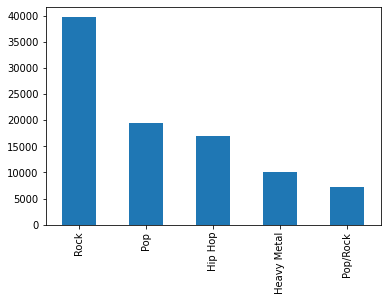

In [14]:
indexNames = []
for index, row in df.iterrows():
    if len(row.Genres.split("; "))>1: #or (row.Genres != "Pop" and row.Genres!="Rap"):
        indexNames.append(index)
df = df.drop(indexNames)

df['Genres'].value_counts().plot.bar()